In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("vikhyatk/synthetic-pepe")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Resolving data files:   0%|          | 0/505 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
print(dataset) #Print the dataset to check structure

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 504
    })
})


In [ ]:
ds = dataset["train"] #Define dataset pepe dataset as ds

In [ ]:
len(ds)

504

In [ ]:
dataset2 = load_dataset("cifar10")

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
print(dataset2)

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})


In [ ]:
# Separate all the frog images in cifar10
frog_indices = [index for index, label in enumerate(dataset2["train"]["label"]) if label == 6]

frog_ds = dataset2["train"].select(frog_indices)
print(frog_ds)

Dataset({
    features: ['img', 'label'],
    num_rows: 5000
})


In [ ]:
frog_ds["label"]

[6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [ ]:
# define a function to change the labels from 6 to 1
def change_labels(example):
    example["label"] = 1
    return example

# Apply the function to each example in the dataset
frog_ds = frog_ds.map(change_labels)

print(frog_ds)


Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset({
    features: ['img', 'label'],
    num_rows: 5000
})


In [ ]:
#Add 0 as label
pepe_label = 0

# Add the "label" feature to the dataset with the default value
dataset["train"] = dataset["train"].add_column("label", [pepe_label] * len(dataset["train"]))

print(dataset["train"])

# dataset["train"] = dataset["train"].remove_columns("label")

Dataset({
    features: ['image', 'label'],
    num_rows: 504
})


In [ ]:
# Rename the "img" feature to "image" in the frog_ds
frog_ds = frog_ds.rename_column("img", "image")

print(frog_ds)


Dataset({
    features: ['image', 'label'],
    num_rows: 5000
})


In [ ]:
import random
from datasets import concatenate_datasets
# Shuffle the frog dataset
frog_ds_shuffled = frog_ds.shuffle(seed=42)

# Select the first 504 images from the shuffled frog dataset
frog_ds_subset = frog_ds_shuffled.select(range(504))

# Remove the "label" feature from the subset of frog dataset
frog_ds_subset = frog_ds_subset.remove_columns("label")

# Concatenate the subset of frog dataset with the original dataset["train"]
combined_ds = concatenate_datasets([dataset["train"], frog_ds_subset])

# Shuffle the combined dataset to keep randomness
train_ds1 = combined_ds.shuffle(seed=42)

print(train_ds1)

Dataset({
    features: ['image', 'label'],
    num_rows: 1008
})


In [ ]:
train_ds1["label"]

[None,
 0,
 0,
 0,
 0,
 0,
 0,
 None,
 0,
 None,
 0,
 None,
 None,
 None,
 None,
 None,
 0,
 None,
 0,
 None,
 0,
 0,
 0,
 0,
 None,
 0,
 None,
 0,
 None,
 None,
 0,
 0,
 None,
 None,
 None,
 0,
 0,
 None,
 None,
 None,
 0,
 None,
 None,
 0,
 None,
 None,
 0,
 0,
 0,
 None,
 0,
 None,
 0,
 None,
 0,
 0,
 0,
 0,
 None,
 None,
 0,
 0,
 None,
 None,
 0,
 0,
 0,
 0,
 0,
 0,
 None,
 0,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 0,
 0,
 None,
 0,
 None,
 0,
 None,
 0,
 None,
 None,
 0,
 0,
 None,
 None,
 None,
 0,
 0,
 0,
 None,
 0,
 0,
 None,
 0,
 None,
 None,
 0,
 0,
 None,
 None,
 0,
 None,
 None,
 0,
 0,
 0,
 0,
 None,
 None,
 None,
 None,
 0,
 None,
 0,
 0,
 0,
 None,
 0,
 0,
 None,
 None,
 0,
 0,
 None,
 0,
 0,
 0,
 0,
 0,
 None,
 0,
 0,
 None,
 None,
 0,
 None,
 0,
 None,
 0,
 0,
 None,
 None,
 0,
 None,
 0,
 None,
 0,
 0,
 0,
 None,
 None,
 None,
 None,
 0,
 None,
 0,
 None,
 0,
 None,
 0,
 0,
 None,
 0,
 None,
 0,
 0,
 None,
 0,
 0,
 None,
 0,
 0,
 None,
 0,
 0,
 0,
 0

In [ ]:
# Define a function to replace None with 1
def replace_none_with_1(example):
    if example["label"] is None:
        example["label"] = 1
    return example

# Apply the function to each example in the dataset
train_dsl = train_ds1.map(replace_none_with_1)


Map:   0%|          | 0/1008 [00:00<?, ? examples/s]

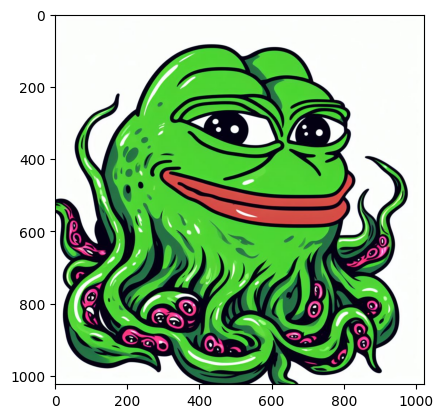

In [ ]:
import matplotlib.pyplot as plt

# Display the first image in train_dsl
plt.imshow(train_dsl[4]["image"])
plt.show()


In [ ]:
len(train_dsl)

1008

In [44]:
val_ds = train_dsl[:200]

In [45]:
total_elements = len(train_dsl)
start_index = total_elements - 200
val_ds = train_dsl.select(range(start_index, total_elements))
print("Number of samples in validation dataset:", len(val_ds))
train_ds = train_dsl.select(range(start_index))
print("Number of samples in training dataset:", len(train_ds))


Number of samples in validation dataset: 200
Number of samples in training dataset: 808


In [46]:
print(start_index)

808


In [47]:
#Print image using plt.imshow
import matplotlib.pyplot as plt
image = train_ds[4]
# plt.imshow(image)
# plt.axis('off')
# plt.show()

print(image)

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x79527CA67AF0>, 'label': 0}


In [48]:
import torch
from torchvision import transforms

# Define transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to 32x32
    transforms.ToTensor(),         # Convert to tensor
])

transformed_ds = []

for sample in train_ds:
    image = sample['image']
    label = sample['label']

    image_tensor = transform(image)
    # Transpose tensor to match the desired shape [3, 32, 32]
    image_tensor = image_tensor.permute(1, 2, 0)
    image_tensor = image_tensor.permute(2, 0, 1)
    transformed_ds.append((image_tensor, label))
print(transformed_ds[0])

(tensor([[[0.9647, 0.9765, 0.9765,  ..., 0.0353, 0.0353, 0.0353],
         [0.9686, 0.9765, 0.9686,  ..., 0.0353, 0.0353, 0.0353],
         [0.9333, 0.9490, 0.9529,  ..., 0.0471, 0.0431, 0.0353],
         ...,
         [0.6667, 0.6941, 0.7255,  ..., 0.5647, 0.6275, 0.6588],
         [0.6471, 0.6784, 0.6941,  ..., 0.6431, 0.6627, 0.6706],
         [0.6314, 0.6549, 0.6588,  ..., 0.6510, 0.6706, 0.6667]],

        [[0.8471, 0.8588, 0.8824,  ..., 0.0431, 0.0471, 0.0353],
         [0.8392, 0.8510, 0.8745,  ..., 0.0471, 0.0431, 0.0353],
         [0.7961, 0.8196, 0.8510,  ..., 0.0510, 0.0431, 0.0353],
         ...,
         [0.5333, 0.5608, 0.5922,  ..., 0.4980, 0.5529, 0.5765],
         [0.5176, 0.5490, 0.5725,  ..., 0.5412, 0.5608, 0.5765],
         [0.5059, 0.5373, 0.5451,  ..., 0.5255, 0.5412, 0.5647]],

        [[0.7020, 0.7255, 0.7765,  ..., 0.0275, 0.0314, 0.0314],
         [0.6706, 0.6980, 0.7490,  ..., 0.0196, 0.0157, 0.0275],
         [0.6118, 0.6510, 0.7137,  ..., 0.0392, 0.0275, 0

In [49]:
for images, labels in transformed_ds:
  print(images.shape)
  break

torch.Size([3, 32, 32])


In [50]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

In [51]:
import torch
from torchvision import transforms

# Define transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize to 32x32
    transforms.ToTensor(),         # Convert to tensor
])

transformed_ds1 = []

for sample in val_ds:
    image = sample['image']
    label = sample['label']

    image_tensor = transform(image)
    # Transpose tensor to match the desired shape [3, 32, 32]
    image_tensor = image_tensor.permute(1, 2, 0)
    image_tensor = image_tensor.permute(2, 0, 1)
    transformed_ds1.append((image_tensor, label))
print(transformed_ds1[0])

(tensor([[[0.9647, 0.9961, 0.9922,  ..., 0.9490, 1.0000, 0.9843],
         [0.8667, 0.9412, 0.7765,  ..., 0.9804, 1.0000, 0.9608],
         [0.7333, 0.5059, 0.3490,  ..., 0.9843, 0.9922, 0.9529],
         ...,
         [0.2980, 0.3176, 0.4902,  ..., 0.4078, 0.4863, 0.3529],
         [0.6000, 0.5569, 0.5255,  ..., 0.5961, 0.4314, 0.4824],
         [0.7647, 0.6510, 0.5490,  ..., 0.5333, 0.4824, 0.3843]],

        [[0.9412, 0.9882, 0.9882,  ..., 0.9725, 1.0000, 0.9647],
         [0.8353, 0.9176, 0.7647,  ..., 0.9882, 0.9922, 0.9333],
         [0.7725, 0.5255, 0.4000,  ..., 0.9843, 0.9765, 0.9216],
         ...,
         [0.5059, 0.5255, 0.5059,  ..., 0.1686, 0.1608, 0.1451],
         [0.6000, 0.6588, 0.6667,  ..., 0.1608, 0.1333, 0.1333],
         [0.6157, 0.6314, 0.6588,  ..., 0.1765, 0.1569, 0.1255]],

        [[0.9373, 0.9451, 0.9451,  ..., 0.9451, 0.9529, 0.9412],
         [0.8980, 0.9137, 0.7529,  ..., 0.9451, 0.9451, 0.9294],
         [0.8745, 0.6196, 0.4549,  ..., 0.9412, 0.9412, 0

In [52]:
#Define batch size and create DataLoader
batch_size = 32
train_dl = DataLoader(transformed_ds, batch_size=batch_size, shuffle=False)
val_dl = DataLoader(transformed_ds1, batch_size=batch_size, shuffle=False)

In [53]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

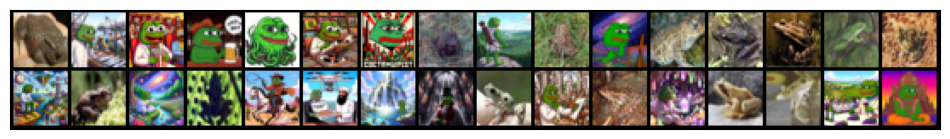

In [54]:
show_batch(train_dl)

In [55]:
import torch.nn as nn
import torch.nn.functional as F

In [56]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

#Pasted code from another file in my local system used for classification

In [57]:
class PepeModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(),
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 2))

    def forward(self, xb):
        return self.network(xb)

In [58]:
model = PepeModel()
model

PepeModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1

In [59]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([32, 3, 32, 32])
out.shape: torch.Size([32, 2])
out[0]: tensor([-0.0199,  0.0236], grad_fn=<SelectBackward0>)


In [60]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

#I have this function saved in my local sys for devicedataloader

In [61]:
device = get_default_device()
device

device(type='cuda')

In [62]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

In [63]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [64]:
model = to_device(PepeModel(), device)

In [65]:
evaluate(model, val_dl)

{'val_loss': 0.6935765147209167, 'val_acc': 0.4642857015132904}

In [66]:
num_epochs = 15
opt_func = torch.optim.Adam
lr = 0.001

In [67]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.6600, val_loss: 0.5764, val_acc: 0.6161
Epoch [1], train_loss: 0.4373, val_loss: 0.3143, val_acc: 0.8348
Epoch [2], train_loss: 0.3808, val_loss: 0.3546, val_acc: 0.7991
Epoch [3], train_loss: 0.2490, val_loss: 0.2521, val_acc: 0.9286
Epoch [4], train_loss: 0.2263, val_loss: 0.2048, val_acc: 0.9464
Epoch [5], train_loss: 0.2022, val_loss: 0.2083, val_acc: 0.9464
Epoch [6], train_loss: 0.1684, val_loss: 0.2316, val_acc: 0.9375
Epoch [7], train_loss: 0.1279, val_loss: 0.4385, val_acc: 0.8527
Epoch [8], train_loss: 0.2369, val_loss: 0.1850, val_acc: 0.9330
Epoch [9], train_loss: 0.1596, val_loss: 0.3118, val_acc: 0.8884
Epoch [10], train_loss: 0.2770, val_loss: 0.1650, val_acc: 0.9420
Epoch [11], train_loss: 0.0974, val_loss: 0.2063, val_acc: 0.9375
Epoch [12], train_loss: 0.0785, val_loss: 0.2704, val_acc: 0.9152
Epoch [13], train_loss: 0.0807, val_loss: 0.2278, val_acc: 0.9464
Epoch [14], train_loss: 0.0788, val_loss: 0.3693, val_acc: 0.9241


In [68]:
import torch

torch.save(model.state_dict(), 'model.pth')
torch.save(model, 'entire_model.pth')


In [69]:
import pickle
# Save the model as a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [70]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

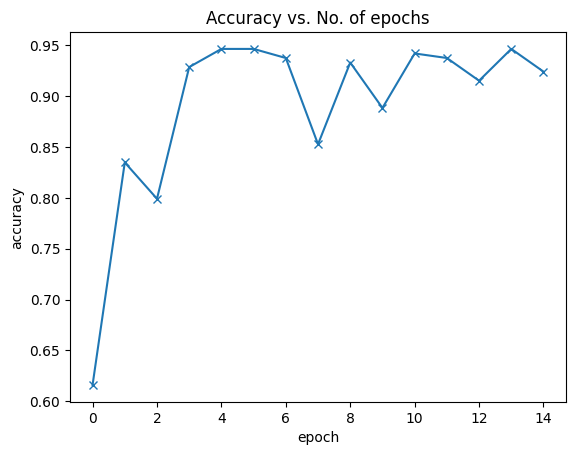

In [71]:
plot_accuracies(history)

In [72]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

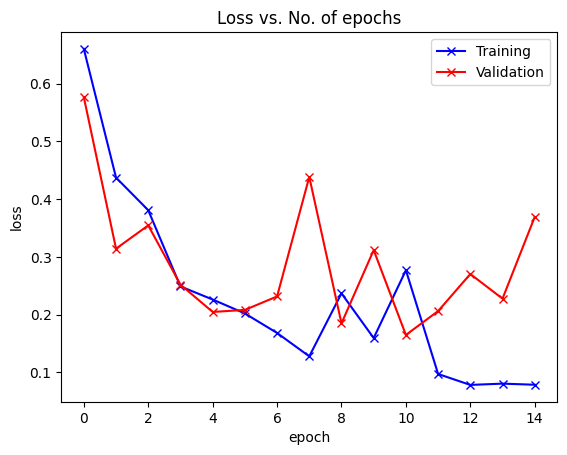

In [73]:
plot_losses(history)

In [74]:
import torch
import torch.nn.functional as F
from torchvision import transforms
from PIL import Image

model = PepeModel()

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

image = Image.open('/content/design.jpg')
image = transform(image)
image = image.unsqueeze(0)
output = model(image)

_, preds  = torch.max(output, dim=1)



In [75]:
preds #Identified pepe in image

tensor([0])

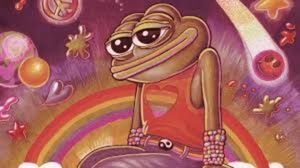

In [78]:
from IPython.display import display, Image
display(Image(filename='/content/design.jpg'))

In [77]:
#Used CIFAR10 dataset for dataset2 and merged it with the original dataset Synthetic Pepe.
#Chose only frog images for merging with original dataset
#Loaded them both and transformed into 32x32 images, also converted the dataset that was a dict into tuple
#for ease of access. Created a simple CNN model and trained for 15 epochs. Got final accuracy of 92%.